# Análisis de datos de alquileres en Nueva York


## Loading the df

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

# Read in the data
df = pd.read_csv('./ConjuntosDeDatos/AirBnB2clean.csv')

Ahora tengo los datos en df,hago un primer approach de visualización

In [60]:
# shape of df
print(df.shape)

# head of df
print(df.head())


(48895, 16)
      id                                               name  host_id  \
0  20739  Perfect 2-bedroom in the best part of Williams...    24864   
1  65164                                    Ditmas park lot    62595   
2  23090            Doorman Gym 2 Beds Luxury Building!5211    52328   
3  36673       seagate pravite house 5 mins away from beach     3184   
4  52600  Sunny & Clean Apt  ideal location E.Williamsburg!    43677   

        host_name neighbourhood_group neighbourhood  latitude  longitude  \
0        Angelina            BROOKLYN             -  40.71983  -73.96465   
1           Brian            Brooklyn      Flatbush  40.63809  -73.96445   
2  Jeremy & Laura           Manhattan   Murray Hill  40.74404  -73.97217   
3           Tural            BROOKLYN      Sea Gate  40.57531  -74.00518   
4          Shahar            BROOKLYN  Williamsburg  40.70684  -73.93854   

         room_type        price  minimum_nights  number_of_reviews  \
0  Entire home/apt        $ 

Ya con ver el head hay varios issues:
- Brooklyn aparece en minúscula y en mayúscula. 
- Los precios aparecen como $, Dollars o USD
- Hay datos sin el Neighborhood marcado
- Si no tiene reviews, reviews_per_month es NaN en vez de 0

de la letra: 
- Inspeccionar los vacios en el dataset:
    - Verificar el tipo de datos de cada columna luego de cargada
    - Contar la cantidad de vacíos, ceros y valores especiales por columna
    - Indicar qué columnas tienen vacíos y como se podrían reparar
    - Modificar las columnas con los datos corregidos

## Purging the dataframe nulls

In [61]:
# print the data types of each column
print(df.dtypes)


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                              object
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


Lo único llamativo es que price es un object. Debería ser numérico pero no lo es por los caracteres especiales ($, USD, Dol., etc.).

In [62]:
# print the number of missing values in each column
print(df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


Hay nulls en name, host_name, last_review y reviews_per_month. Procedo a chequear por qué

In [63]:
# print the rows with missing name
print(df[df['name'].isnull()])


          id name  host_id host_name neighbourhood_group       neighbourhood  \
840    19249  NaN    14504     Peter           MANHATTAN                   -   
2573   57455  NaN    36969    Andrea               BRONX             Fordham   
9195   21296  NaN    47920   Vanessa            Brooklyn                   -   
11012  41550  NaN    40296      Jeff            Brooklyn  Bedford-Stuyvesant   
11064  51067  NaN    38470     Jesse           Manhattan                   -   
11325  64832  NaN    49098   Michaël           MANHATTAN                   -   
13763  21217  NaN    57157       Yan           Manhattan     Upper West Side   
29520  10816  NaN    57238      Josh           Manhattan  Washington Heights   
32655  50542  NaN    16911     Lucie            Brooklyn        Williamsburg   
33276  26179  NaN    49636  Huei-Yin            BROOKLYN                   -   
33818  38831  NaN    43734  Jonathan           MANHATTAN                   -   
34039  46342  NaN      238    Miguel    

In [64]:
# print the rows with missing host_name
print(df[df['host_name'].isnull()])

          id                                               name  host_id  \
1900   61295              Spacious 2 bedroom close to Manhattan    27498   
4037    5028                       R&S Modern Spacious Hideaway    43896   
4561   57984                                  Cozy Room Astoria    11464   
4956   24931                 Charming Room in Prospect Heights!    59948   
7462   51204                            Cozy Studio in Flatbush    64157   
13863  36605                          Modern Quiet Gem Near All    43896   
13970  18929         Spacious and Bright Midtown East Apartment    41988   
14195  36326    Private Bedroom w/ Balcony view of Central Park    18775   
14917  40614                    1 Bedroom in Prime Williamsburg    51705   
15600   1778  Best Deal! Lovely place in Manhattan! Time Squ...    16364   
23100  34063                               Sunny Room in Harlem    12480   
24205  62021                 Sunny, spacious room in Greenpoint    31525   
24483   1991

Las entradas con algún nombre vacío parecen ser válidas por lo demás. Podemos sustituir el nombre por un nombre ficto, como 'No Name'

In [65]:
# replace missing values in name with 'No Name'
df['name'].fillna('No Name', inplace=True)

# replace missing values in host_name with 'No Name'
df['host_name'].fillna('No Name', inplace=True)

In [66]:
#sanity check availability_365 does not exceed 365 days
print(np.sort(df['availability_365'].unique()))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

Puedo solucionar los nulls de reviews_per_month reemplazandolos por 0, parece ser un error de que se hace nan cuando la casa tiene 0 reseñas. 

Puedo poner un 'No review' en los nans de "last_review", que queda en nan cuando no se tienen reviews.

In [67]:
# change all NaN in reviews_per_month to 0
df.reviews_per_month.fillna(0, inplace=True)

# sanity check
print(df.reviews_per_month.unique()[:10])

# change all NaNs in last_review to 'No Review'
df.last_review.fillna('No Review', inplace=True)

[0.   0.07 0.15 3.88 4.69 0.22 0.21 0.95 1.22 0.16]


In [68]:
# sanity check that now there are no NaNs in df
print(df.isnull().sum())

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


## Reformatting columns

In [69]:
#list all unique values in the column 'neighbourhood_group'
print(df.neighbourhood_group.unique())

['BROOKLYN' 'Brooklyn' 'Manhattan' 'MANHATTAN' 'BROKLYN/NY' 'QUEENS'
 'Manhattan/NY' 'Broo.' 'Manh.' 'Queens' 'BRONX' 'Bronx' 'Queens/NYC'
 'MANHATAN' 'STATEN ISLAND' 'Staten Island' 'ST. ISL.' 'Staten Isl.']


In [70]:
# 'BROOKLYN' 'Brooklyn' 'BROKLYN/NY' 'Broo.' should be fused
# 'Manhattan' 'MANHATTAN' 'Manhattan/NY' 'Manh.' 'MANHATAN' should be fused
# 'QUEENS' 'Queens' 'Queens/NYC' should be fused
# 'BRONX' 'Bronx' should be fused
# 'STATEN ISLAND' 'Staten Island' 'ST. ISL.' 'Staten Isl.' should be fused

# Replace the values in the column 'neighbourhood_group'
df.neighbourhood_group.replace(['BROOKLYN', 'Brooklyn', 'BROKLYN/NY', 'Broo.'], 'Brooklyn', inplace=True)
df.neighbourhood_group.replace(['Manhattan', 'MANHATTAN', 'Manhattan/NY', 'Manh.', 'MANHATAN'], 'Manhattan', inplace=True)
df.neighbourhood_group.replace(['QUEENS', 'Queens', 'Queens/NYC'], 'Queens', inplace=True)
df.neighbourhood_group.replace(['BRONX', 'Bronx'], 'Bronx', inplace=True)
df.neighbourhood_group.replace(['STATEN ISLAND', 'Staten Island', 'ST. ISL.', 'Staten Isl.'], 'Staten Island', inplace=True)

#list all unique values in the column 'neighbourhood_group'
print(df.neighbourhood_group.unique()) #sanity check

['Brooklyn' 'Manhattan' 'Queens' 'Bronx' 'Staten Island']


In [71]:
#list all unique values in the column 'neighbourhood' ordered alphabetically
print(df.neighbourhood.unique())

['-' 'Flatbush' 'Murray Hill' 'Sea Gate' 'Williamsburg'
 'Bedford-Stuyvesant' 'Chelsea' 'Park Slope' 'Fresh Meadows'
 "Hell's Kitchen" 'Upper West Side' 'West Village' 'SoHo'
 'Prospect-Lefferts Gardens' 'Chinatown' 'Bushwick' 'Ridgewood' 'Kips Bay'
 'Crown Heights' 'Gramercy' 'Upper East Side' 'South Slope'
 'Financial District' 'Prospect Heights' 'Elmhurst' 'Lower East Side'
 'Midtown' 'East New York' 'Greenpoint' 'Harlem' 'Gravesend'
 'Sheepshead Bay' 'East Village' 'Long Island City' 'NoHo' 'Fort Greene'
 'Midwood' 'Morris Park' 'Boerum Hill' 'South Ozone Park' 'Flushing'
 'East Harlem' 'Inwood' 'Sunset Park' 'Pelham Gardens' 'Astoria'
 'Sunnyside' 'Morris Heights' 'Brownsville' 'East Elmhurst' 'Civic Center'
 'Washington Heights' 'Bay Ridge' 'Clinton Hill' 'Wakefield'
 'East Flatbush' 'Brooklyn Heights' 'Morningside Heights'
 'Theater District' 'Tribeca' 'Middle Village' 'Canarsie' 'Kingsbridge'
 'Bellerose' 'Kensington' 'Cypress Hills' 'Windsor Terrace' 'Flatlands'
 'Jamaica' 'Li

There seem to be no coincidences in the 221 neighborhoods.

In [72]:
#print some unique values in the price column
print(df.price.unique()[40:100])

['230' '$ 41' 'USD 85' '200 Do.' '$ 38' '59 Dollars' 'USD 119' '74'
 'USD 198' 'USD 129' '125' 'USD 35' '50 Dollars' '$274' 'USD 125' '175'
 '220 Dollars' '140' '241 Dollars' '$ 35' 'USD 123' '350 Dollars'
 '195 Do.' '199 Do.' 'USD 200' '$225' 'USD 325' '225 Dollars' '70 Do.'
 'USD 890' '$475' '250' '96 Dollars' '46 Dollars' '$ 90' '375 Dollars'
 '$165' '55 Dollars' '190 Dollars' '$155' '$40' '105 Dollars' '$ 255'
 '$280' 'USD 130' '53' '20' 'USD 300' '75 Dollars' '299' '$ 737' '$72'
 'USD 134' '70 Dollars' 'USD 195' '65 Do.' '269' '$99' '200' '$ 95']


In [73]:
# now fix the issue with dollar signs, retaining only the numeric values
df.price = df.price.str.replace('[^\d.]', '', regex=True) #remove all non-numeric characters
df.price = df.price.astype(float)

# sanity check
print(df.price.unique()[40:100])


[  74.  198.  129.   35.  274.  175.  220.  140.  241.  123.  350.  195.
  325.  890.  475.   96.   46.  375.  165.   55.  190.  155.  105.  255.
  280.  130.   53.   20.  737.   72.  134.   65.  269.   95.  379.  287.
   51.  100.   36.   12.   49.  170.  160.  172.  399.  189.   52.  112.
  124.  117.  187.  289.  136.  159. 6419.  550.  151.  347.  227.  239.]


With this the database is correctly formatted and we can start processing

## Graphical representations of the data by neighbourhood group

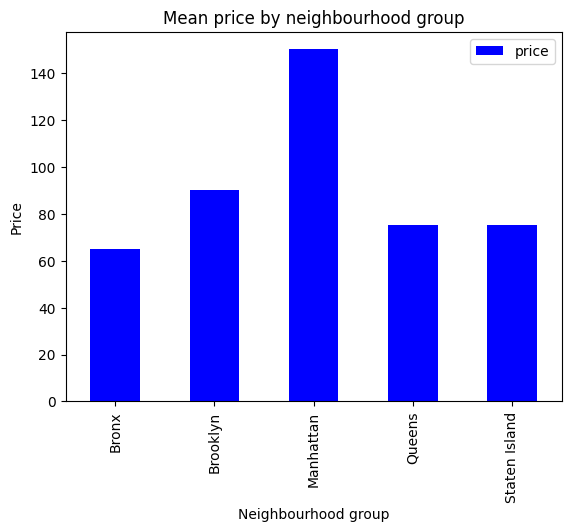

In [78]:
# create a new dataframe with the median price per neighbourhood_group
df_price = df.groupby('neighbourhood_group').agg({'price': 'median'}).reset_index()

# create a bar plot of the new dataframe
fig, ax = plt.subplots()
df_price.plot(kind='bar', x='neighbourhood_group', y='price', ax=ax, color='blue')

# set the plot title and axis labels
ax.set_title('Mean price by neighbourhood group')
ax.set_xlabel('Neighbourhood group')
ax.set_ylabel('Price')

# display the plot
plt.show()

(0.0, 1250.0)

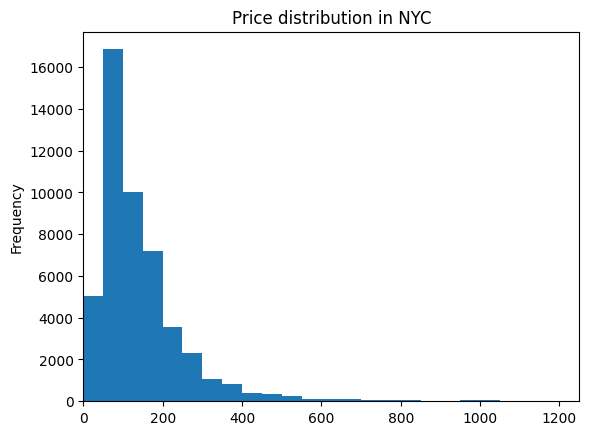

In [83]:
# plot all prices of NYC
ax = df.price.plot(kind='hist', bins=200, title='Price distribution in NYC')
ax.set_xlim((0, 1250))

[]

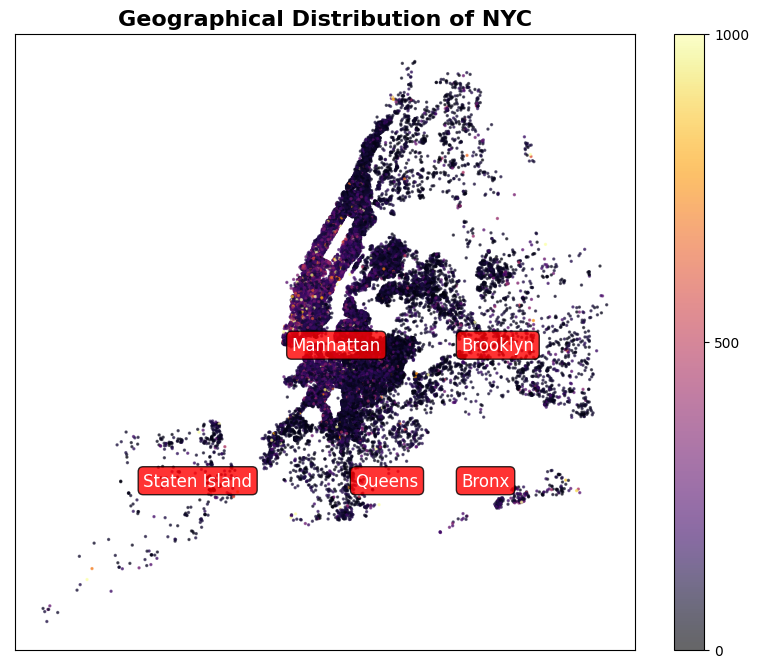

In [101]:
# plot geographical distribution of NYC
fig, ax = plt.subplots(figsize=(10, 8))
ax = df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.6, c=df['price'], s=2, cmap=plt.get_cmap('inferno'), colorbar=True, ax=ax)
ax.set_title('Geographical Distribution of NYC', fontsize=16, fontweight='bold')

# set the range of the colorbar to [0, 1000]
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0, 500, 1000])
colorbar.set_ticklabels(['$0', '$500', '$1000'])
ax.collections[0].colorbar.mappable.set_clim([0,1000])

# add labels for each borough
ax.text(-74.01, 40.70, 'Manhattan', fontsize=12, color='white', bbox=dict(facecolor='red', alpha=0.8, boxstyle='round'))
ax.text(-73.85, 40.70, 'Brooklyn', fontsize=12, color='white', bbox=dict(facecolor='red', alpha=0.8, boxstyle='round'))
ax.text(-73.95, 40.60, 'Queens', fontsize=12, color='white', bbox=dict(facecolor='red', alpha=0.8, boxstyle='round'))
ax.text(-73.85, 40.60, 'Bronx', fontsize=12, color='white', bbox=dict(facecolor='red', alpha=0.8, boxstyle='round'))
ax.text(-74.15, 40.60, 'Staten Island', fontsize=12, color='white', bbox=dict(facecolor='red', alpha=0.8, boxstyle='round'))

# remove axes labels and ticks
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])
ax.set_yticks([])

## Statistics by neighbourhood group/borough

In [102]:
# by neighbourhood group, calculate min price, max price, mean, median, and number of listings
df_price = df.groupby('neighbourhood_group').agg({'price': ['min', 'max', 'mean', 'median', 'count']}).reset_index()

# rename the columns
df_price.columns = ['neighbourhood_group', 'min_price', 'max_price', 'mean_price', 'median_price', 'count']

# print the dataframe
print(df_price)

  neighbourhood_group  min_price  max_price  mean_price  median_price  count
0               Bronx        0.0     2500.0   87.496792          65.0   1091
1            Brooklyn        0.0    10000.0  124.383207          90.0  20104
2           Manhattan        0.0    10000.0  196.875814         150.0  21661
3              Queens       10.0    10000.0   99.517649          75.0   5666
4       Staten Island       13.0     5000.0  114.812332          75.0    373
